<a href="https://colab.research.google.com/github/machiwao/ml-development/blob/main/Kaggle_Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spaceship Titanic
Reference: https://www.kaggle.com/competitions/spaceship-titanic/overview


In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [373]:
df = pd.read_csv('train.csv')
dt = pd.read_csv('test.csv')

df['train_data'] = df['Transported'].notnull()
dt['train_data'] = dt['Transported'].notnull()

all_data = pd.concat([df, dt], axis=0)
all_data.head()

KeyError: 'Transported'

In [311]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [313]:
df.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [314]:
df['Transported'].value_counts()

,count
Transported,
True,4378
False,4315


In [315]:
df.duplicated().sum()

0

In [316]:
for col in df.columns:
    print(col, df[col].unique())

PassengerId ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet ['Europa' 'Earth' 'Mars' nan]
CryoSleep [False True nan]
Cabin ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Age [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
VIP [False True nan]
RoomService [   0.  109.   43. ... 1569. 8586.  745.]
FoodCourt [   0.    9. 3576. ... 3208. 6819. 4688.]
ShoppingMall [   0.   25.  371. ... 1085.  510. 1872.]
Spa [   0.  549. 6715. ... 2868. 1107. 1643.]
VRDeck [   0.   44.   49. ... 1164.  971. 3235.]
Name ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']

In [317]:
for col in df.columns:
    print(col, df[col].unique())

PassengerId ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet ['Europa' 'Earth' 'Mars' nan]
CryoSleep [False True nan]
Cabin ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Age [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
VIP [False True nan]
RoomService [   0.  109.   43. ... 1569. 8586.  745.]
FoodCourt [   0.    9. 3576. ... 3208. 6819. 4688.]
ShoppingMall [   0.   25.  371. ... 1085.  510. 1872.]
Spa [   0.  549. 6715. ... 2868. 1107. 1643.]
VRDeck [   0.   44.   49. ... 1164.  971. 3235.]
Name ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']

## Initial Data Visualization

In [318]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
target_col = ['Transported']

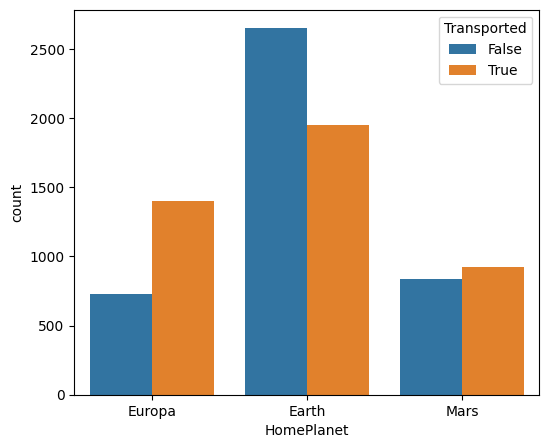

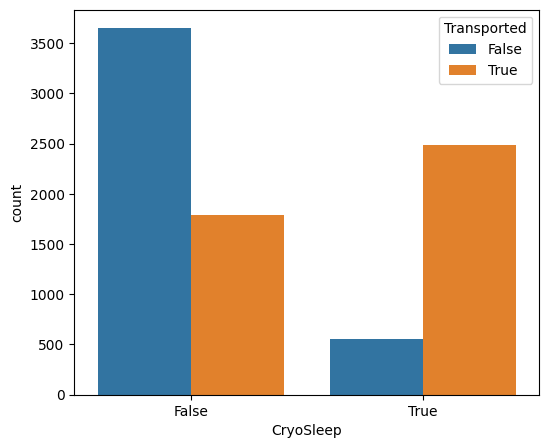

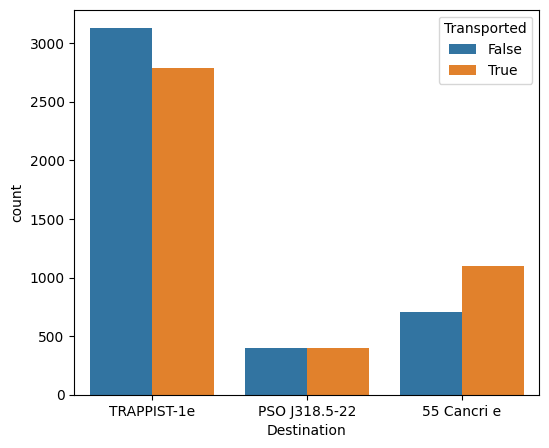

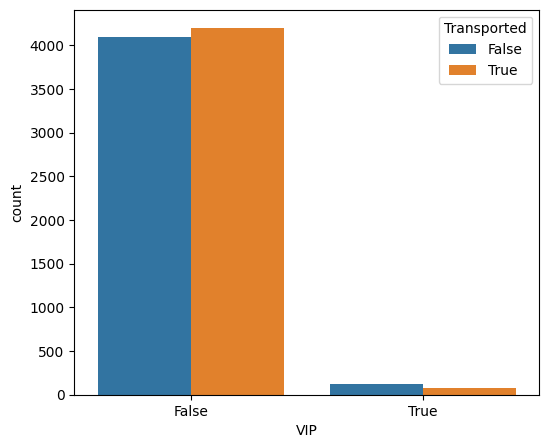

In [319]:
for col in categorical_cols:
    plt.figure(figsize=(6, 5))
    sns.countplot(x=col, data=df, hue=target_col[0])
    plt.show()

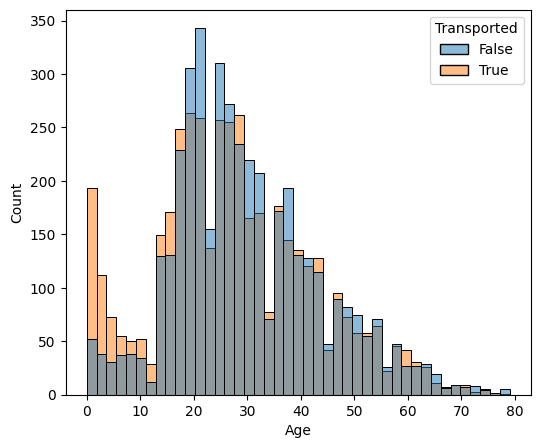

In [320]:
plt.figure(figsize=(6, 5))
sns.histplot(x='Age', data=df, hue=target_col[0])
plt.show()

In [321]:
pd.pivot_table(df, index='Transported', values=numerical_cols, aggfunc='mean')

,Age,FoodCourt,RoomService,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,382.615930,389.266066,167.566217,564.382666,543.629822
True,27.748834,532.691984,63.098021,179.829972,61.675531,69.148131


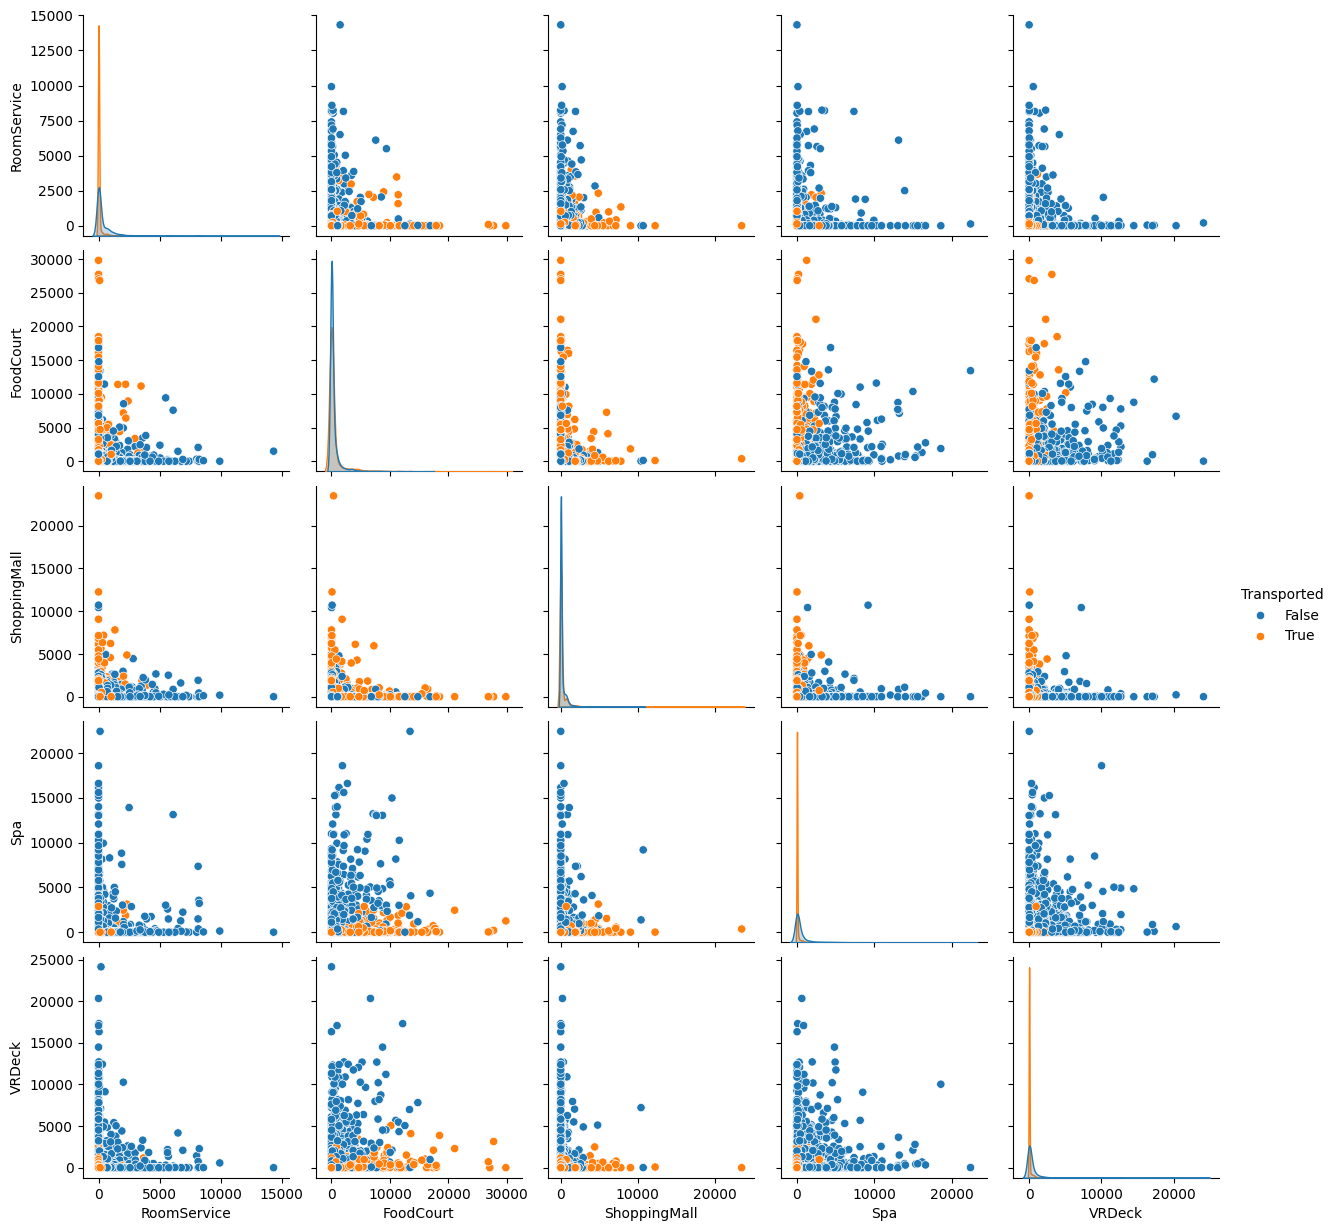

In [322]:
sns.pairplot(df, vars=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], hue=target_col[0])
plt.show()

## Feature Engineering

In [323]:
df.drop(['VIP'], axis=1, inplace=True)
dt.drop(['VIP'], axis=1, inplace=True)

## Generate New Features

In [324]:
def extract_last_name(x):
    try:
        return str(x).split(' ')[1]
    except (IndexError, AttributeError):
        return None

In [325]:
df['LastName'] = df['Name'].apply(extract_last_name)
df['family_size'] = df.groupby('LastName')['LastName'].transform('count')
dt['LastName'] = dt['Name'].apply(extract_last_name)
dt['family_size'] = dt.groupby('LastName')['LastName'].transform('count')

dt.drop(['Name'], axis=1, inplace=True)
df.drop(['Name'], axis=1, inplace=True)
dt.drop(['LastName'], axis=1, inplace=True)
df.drop(['LastName'], axis=1, inplace=True)

In [326]:
df['PassengerGroup'] = df['PassengerId'].apply(lambda x: x.split('_')[0])
df['PassengerNumber'] = df['PassengerId'].apply(lambda x: x.split('_')[1])
df['GroupSize'] = df.groupby('PassengerGroup')['PassengerGroup'].transform('count')

dt['PassengerGroup'] = dt['PassengerId'].apply(lambda x: x.split('_')[0])
dt['PassengerNumber'] = dt['PassengerId'].apply(lambda x: x.split('_')[1])
dt['GroupSize'] = dt.groupby('PassengerGroup')['PassengerGroup'].transform('count')

df.drop(['PassengerId', 'PassengerGroup', 'PassengerNumber'], axis=1, inplace=True)
dt.drop(['PassengerId', 'PassengerGroup', 'PassengerNumber'], axis=1, inplace=True)

In [327]:
df["TravelAlone"] = (df["family_size"] == 1) | (df["GroupSize"] == 1)
dt["TravelAlone"] = (dt["family_size"] == 1) | (dt["GroupSize"] == 1)

In [328]:
df['CabinDeck'] = df['Cabin'].fillna('').apply(lambda x: x.split('/')[0] if x else np.nan)
df['CabinNum'] = df['Cabin'].fillna('').apply(lambda x: x.split('/')[1] if x else np.nan)
df['CabinSide'] = df['Cabin'].fillna('').apply(lambda x: x.split('/')[2] if x else np.nan)

dt['CabinDeck'] = dt['Cabin'].fillna('').apply(lambda x: x.split('/')[0] if x else np.nan)
dt['CabinNum'] = dt['Cabin'].fillna('').apply(lambda x: x.split('/')[1] if x else np.nan)
dt['CabinSide'] = dt['Cabin'].fillna('').apply(lambda x: x.split('/')[2] if x else np.nan)

df["CabinDeck"].fillna(df["CabinDeck"].mode()[0],inplace=True)
df["CabinSide"].fillna(df["CabinSide"].mode()[0],inplace=True)
df["CabinNum"].fillna(df["CabinNum"].median(),inplace=True)

dt["CabinDeck"].fillna(dt["CabinDeck"].mode()[0],inplace=True)
dt["CabinSide"].fillna(dt["CabinSide"].mode()[0],inplace=True)
dt["CabinNum"].fillna(dt["CabinNum"].median(),inplace=True)

dt.drop(['Cabin'], axis=1, inplace=True)
df.drop(['Cabin'], axis=1, inplace=True)

In [329]:
def cabin_regions(df):
    df["CabinNum"] = pd.to_numeric(df["CabinNum"], errors='coerce')
    df["Cabin_Region1"] = (df["CabinNum"]<300)
    df["Cabin_Region2"] = (df["CabinNum"]>=300) & (df["CabinNum"]<600)
    df["Cabin_Region3"] = (df["CabinNum"]>=600) & (df["CabinNum"]<900)
    df["Cabin_Region4"] = (df["CabinNum"]>=900) & (df["CabinNum"]<1200)
    df["Cabin_Region5"] = (df["CabinNum"]>=1200) & (df["CabinNum"]<1500)
    df["Cabin_Region6"] = (df["CabinNum"]>=1500)

In [330]:
cabin_regions(df)
cabin_regions(dt)

In [331]:
df.drop(['CabinNum'], axis=1, inplace=True)
dt.drop(['CabinNum'], axis=1, inplace=True)

In [332]:
def classify_age(age):
    if age <= 12:
        return 'Child'
    elif 13 <= age <= 19:
        return 'Teenager'
    elif 20 <= age <= 35:
        return 'Young Adult'
    elif 36 <= age <= 50:
        return 'Middle-aged Adult'
    elif 51 <= age <= 65:
        return 'Older Adult'
    elif age > 65:
        return 'Senior'
    else:
        return 'Unknown'

In [333]:
df['AgeGroup'] = df['Age'].apply(classify_age)
dt['AgeGroup'] = dt['Age'].apply(classify_age)

df.drop(['Age'], axis=1, inplace=True)
dt.drop(['Age'], axis=1, inplace=True)

In [334]:
df['RoomService'].fillna(df['RoomService'].median(), inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].median(), inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].median(), inplace=True)
df['Spa'].fillna(df['Spa'].median(), inplace=True)
df['VRDeck'].fillna(df['VRDeck'].median(), inplace=True)

In [335]:
dt['RoomService'].fillna(dt['RoomService'].median(), inplace=True)
dt['FoodCourt'].fillna(dt['FoodCourt'].median(), inplace=True)
dt['ShoppingMall'].fillna(dt['ShoppingMall'].median(), inplace=True)
dt['Spa'].fillna(dt['Spa'].median(), inplace=True)
dt['VRDeck'].fillna(dt['VRDeck'].median(), inplace=True)

In [336]:
df['TotalExpenses'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
dt['TotalExpenses'] = dt['RoomService'] + dt['FoodCourt'] + dt['ShoppingMall'] + dt['Spa'] + dt['VRDeck']

In [337]:
def expenditure_category(df):
    expense_category = []

    for i in df["TotalExpenses"]:
        if i==0:
            expense_category.append("No Expense")
        elif (i>0 and i<=716):
            expense_category.append("Low Expense")
        elif (i>716 and i<=1441):
            expense_category.append("Medium Expense")
        elif (i>1441):
            expense_category.append("High Expense")

    df["Expenditure_Category"] = expense_category

In [338]:
expenditure_category(df)
expenditure_category(dt)

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HomePlanet            8492 non-null   object 
 1   CryoSleep             8476 non-null   object 
 2   Destination           8511 non-null   object 
 3   RoomService           8693 non-null   float64
 4   FoodCourt             8693 non-null   float64
 5   ShoppingMall          8693 non-null   float64
 6   Spa                   8693 non-null   float64
 7   VRDeck                8693 non-null   float64
 8   Transported           8693 non-null   bool   
 9   family_size           8493 non-null   float64
 10  GroupSize             8693 non-null   int64  
 11  TravelAlone           8693 non-null   bool   
 12  CabinDeck             8693 non-null   object 
 13  CabinSide             8693 non-null   object 
 14  Cabin_Region1         8693 non-null   bool   
 15  Cabin_Region2        

In [340]:
df.isnull().sum()

,0
HomePlanet,201
CryoSleep,217
Destination,182
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0
Transported,0
family_size,200


In [341]:
for label in df.columns:
    print(label, df[label].unique())

HomePlanet ['Europa' 'Earth' 'Mars' nan]
CryoSleep [False True nan]
Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
RoomService [   0.  109.   43. ... 1569. 8586.  745.]
FoodCourt [   0.    9. 3576. ... 3208. 6819. 4688.]
ShoppingMall [   0.   25.  371. ... 1085.  510. 1872.]
Spa [   0.  549. 6715. ... 2868. 1107. 1643.]
VRDeck [   0.   44.   49. ... 1164.  971. 3235.]
Transported [False  True]
family_size [ 1.  4.  6.  7.  5.  3. nan  2. 10.  8.  9. 11. 16. 14. 13. 12. 15. 18.]
GroupSize [1 2 3 6 4 7 5 8]
TravelAlone [ True False]
CabinDeck ['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
CabinSide ['P' 'S']
Cabin_Region1 [ True False]
Cabin_Region2 [False  True]
Cabin_Region3 [False  True]
Cabin_Region4 [False  True]
Cabin_Region5 [False  True]
Cabin_Region6 [False  True]
AgeGroup ['Middle-aged Adult' 'Young Adult' 'Older Adult' 'Teenager' 'Child'
 'Unknown' 'Senior']
TotalExpenses [    0.   736. 10383. ...  8803.  8536.  4637.]
Expenditure_Category ['No Expense' 'Medium Expense' 'Hig

### Handling Missing Values

In [342]:
df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)
df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)
df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)

dt['HomePlanet'].fillna(dt['HomePlanet'].mode()[0], inplace=True)
dt['CryoSleep'].fillna(dt['CryoSleep'].mode()[0], inplace=True)
dt['Destination'].fillna(dt['Destination'].mode()[0], inplace=True)

In [343]:
# df['TotalExpenses'].fillna(df['TotalExpenses'].median(), inplace=True)
df['family_size'].fillna(1, inplace=True)


In [344]:
# dt['TotalExpenses'].fillna(dt['TotalExpenses'].median(), inplace=True)
dt['family_size'].fillna(1, inplace=True)


In [345]:
df.isnull().sum()

,0
HomePlanet,0
CryoSleep,0
Destination,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0
Transported,0
family_size,0


In [346]:
dt.isnull().sum()

,0
HomePlanet,0
CryoSleep,0
Destination,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0
family_size,0
GroupSize,0


### Log transformation of Numerical Values

In [347]:
log_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalExpenses']
for col in log_cols:
    df[col] = np.log1p(df[col])
    dt[col] = np.log1p(dt[col])

### Duplicate Handling

In [348]:
df.duplicated().sum()

682

In [349]:
dt.duplicated().sum()

363

In [350]:
df.drop_duplicates(inplace=True)

## Final Data Visualization

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8011 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HomePlanet            8011 non-null   object 
 1   CryoSleep             8011 non-null   bool   
 2   Destination           8011 non-null   object 
 3   RoomService           8011 non-null   float64
 4   FoodCourt             8011 non-null   float64
 5   ShoppingMall          8011 non-null   float64
 6   Spa                   8011 non-null   float64
 7   VRDeck                8011 non-null   float64
 8   Transported           8011 non-null   bool   
 9   family_size           8011 non-null   float64
 10  GroupSize             8011 non-null   int64  
 11  TravelAlone           8011 non-null   bool   
 12  CabinDeck             8011 non-null   object 
 13  CabinSide             8011 non-null   object 
 14  Cabin_Region1         8011 non-null   bool   
 15  Cabin_Region2         8011

In [352]:
categorical = ['HomePlanet', 'CryoSleep', 'Destination', 'AgeGroup', 'CabinDeck', 'CabinSide', 'Expenditure_Category', 'TravelAlone']

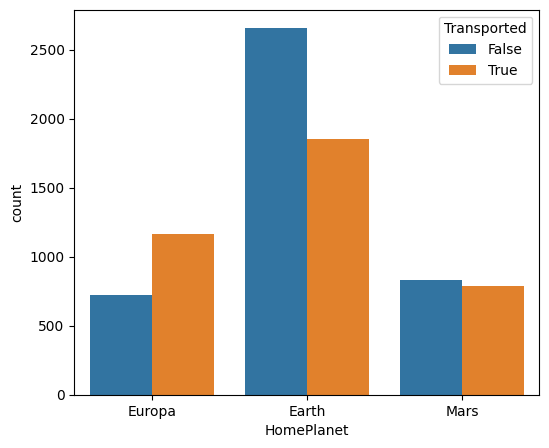

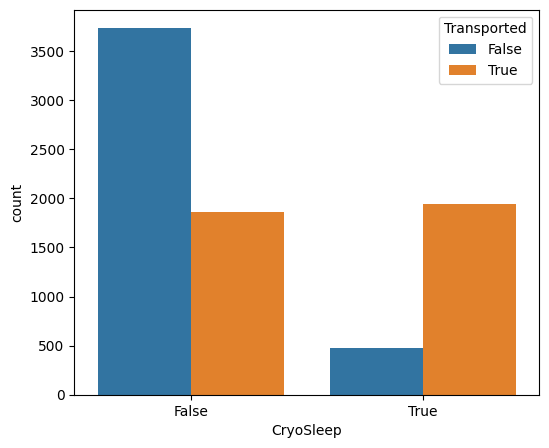

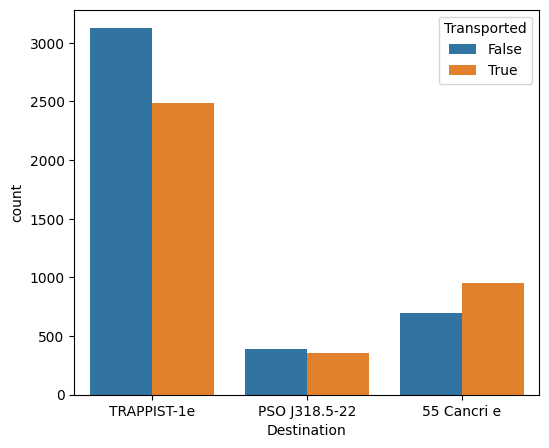

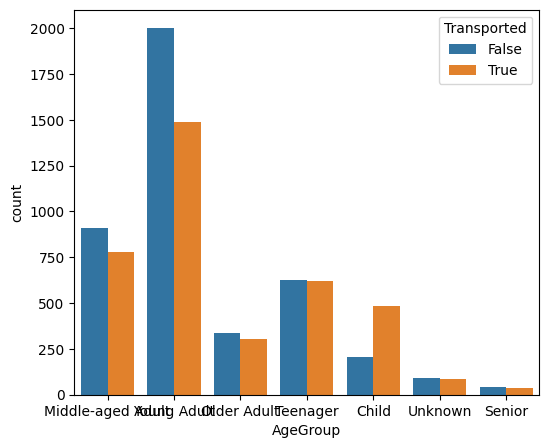

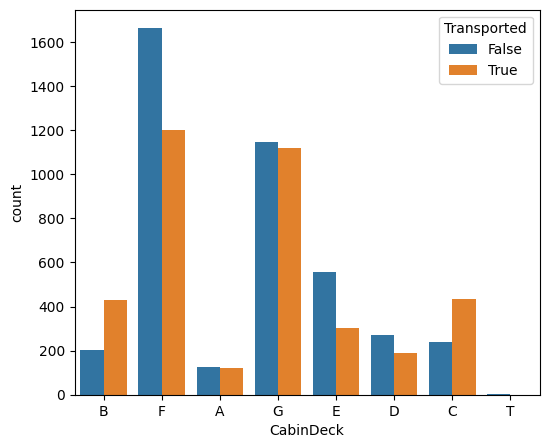

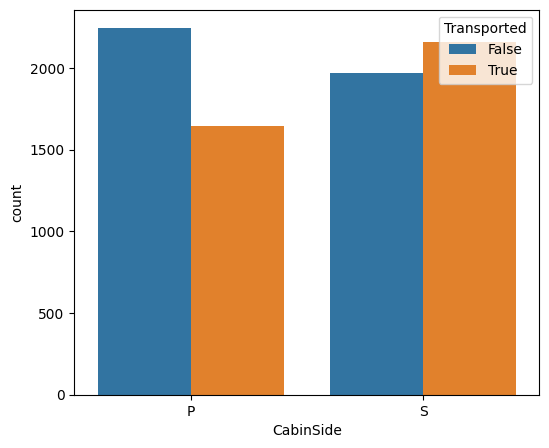

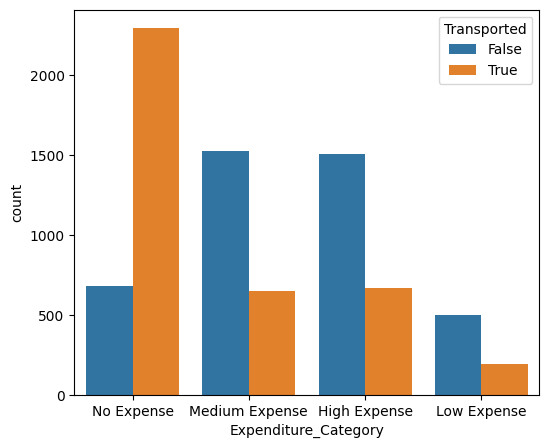

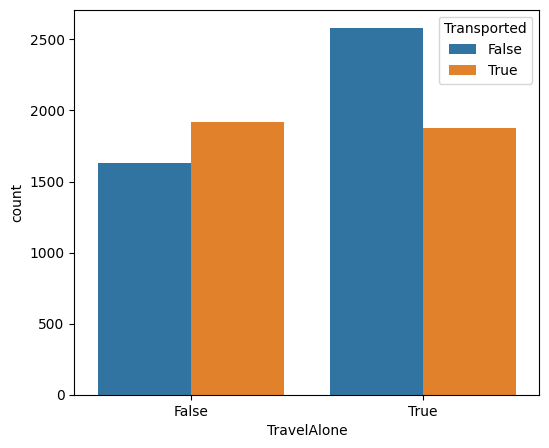

In [353]:
for col in categorical:
    plt.figure(figsize=(6, 5))
    sns.countplot(x=col, data=df, hue=target_col[0])
    plt.show()

In [354]:
numerical = ['family_size', 'GroupSize']

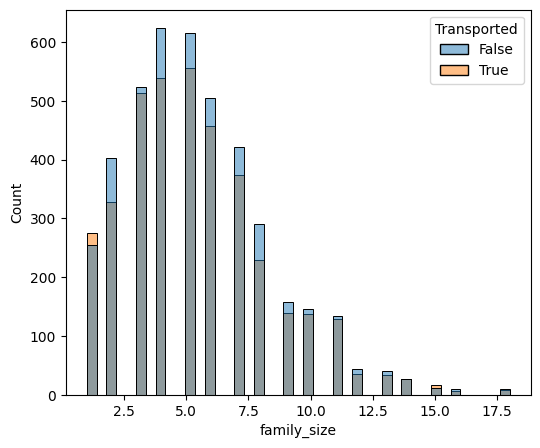

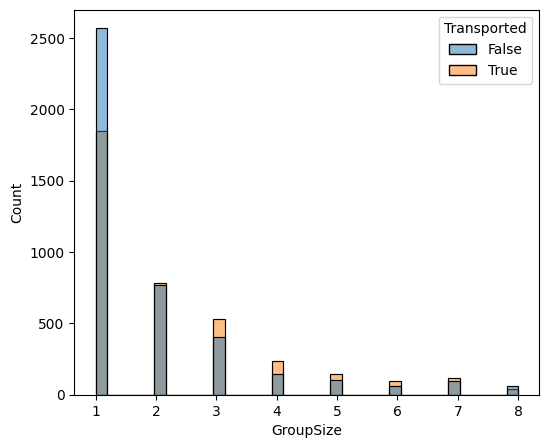

In [355]:
for col in numerical:
    plt.figure(figsize=(6, 5))
    sns.histplot(x=col, data=df, hue=target_col[0])
    plt.show()

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8011 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HomePlanet            8011 non-null   object 
 1   CryoSleep             8011 non-null   bool   
 2   Destination           8011 non-null   object 
 3   RoomService           8011 non-null   float64
 4   FoodCourt             8011 non-null   float64
 5   ShoppingMall          8011 non-null   float64
 6   Spa                   8011 non-null   float64
 7   VRDeck                8011 non-null   float64
 8   Transported           8011 non-null   bool   
 9   family_size           8011 non-null   float64
 10  GroupSize             8011 non-null   int64  
 11  TravelAlone           8011 non-null   bool   
 12  CabinDeck             8011 non-null   object 
 13  CabinSide             8011 non-null   object 
 14  Cabin_Region1         8011 non-null   bool   
 15  Cabin_Region2         8011

## One-hot Encoding

In [357]:
df = pd.get_dummies(df, columns=['HomePlanet', 'CryoSleep', 'Destination', 'TravelAlone'], drop_first=True)
dt = pd.get_dummies(dt, columns=['HomePlanet', 'CryoSleep', 'Destination', 'TravelAlone'], drop_first=True)

In [358]:
ordinal_cat = ['AgeGroup', 'CabinDeck', 'CabinSide', 'Expenditure_Category']

In [359]:
le = LabelEncoder()
for col in ordinal_cat:
    df[col] = le.fit_transform(df[col])
    dt[col] = le.fit_transform(dt[col])

In [360]:
df['Transported'] = df['Transported'].astype(int)
df['Cabin_Region1'] = df['Cabin_Region1'].astype(int)
df['Cabin_Region2'] = df['Cabin_Region2'].astype(int)
df['Cabin_Region3'] = df['Cabin_Region3'].astype(int)
df['Cabin_Region4'] = df['Cabin_Region4'].astype(int)
df['Cabin_Region5'] = df['Cabin_Region5'].astype(int)
df['Cabin_Region6'] = df['Cabin_Region6'].astype(int)

In [361]:
dt['Cabin_Region1'] = dt['Cabin_Region1'].astype(int)
dt['Cabin_Region2'] = dt['Cabin_Region2'].astype(int)
dt['Cabin_Region3'] = dt['Cabin_Region3'].astype(int)
dt['Cabin_Region4'] = dt['Cabin_Region4'].astype(int)
dt['Cabin_Region5'] = dt['Cabin_Region5'].astype(int)
dt['Cabin_Region6'] = dt['Cabin_Region6'].astype(int)

In [362]:
scaled_cols = ['family_size', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'GroupSize', 'TotalExpenses']
# scaled_cols = ['family_size', 'TotalExpenses']

In [363]:
scaler = StandardScaler()
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])
dt[scaled_cols] = scaler.fit_transform(dt[scaled_cols])

In [364]:
df.corr()['Transported'].abs().sort_values(ascending=False)

,Transported
Transported,1.000000
TotalExpenses,0.444313
CryoSleep_True,0.432100
Expenditure_Category,0.360564
Spa,0.343261
RoomService,0.338332
VRDeck,0.319637
HomePlanet_Europa,0.158276
ShoppingMall,0.150519
TravelAlone_True,0.119059


## Data Preparation

In [365]:
X = df.drop(['Transported'], axis=1)
y = df['Transported']

In [366]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6408, 24) (1603, 24) (6408,) (1603,)


## Model Training

In [367]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

## Model Testing and Metrics

In [368]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       846
           1       0.78      0.66      0.71       757

    accuracy                           0.75      1603
   macro avg       0.76      0.75      0.75      1603
weighted avg       0.76      0.75      0.75      1603



Modified Features Accuracy = 0.7517

In [369]:
print(accuracy_score(y_test, y_pred))

0.751715533374922


In [370]:
sf = pd.read_csv('sample_submission.csv')
sf.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [371]:
id = sf.pop('PassengerId')
y_pred = model.predict(dt)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'PassengerId': id,
    'Transported': y_pred.astype(bool)
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
